## Set-up
### Module imports

In [719]:
from irp.q import Q
from irp.envs import Sahba2008UltraSoundEnv
from irp.wrappers import Discretize
from irp import utils

from gym.wrappers import TimeLimit
import numpy as np

import copy
import matplotlib.pyplot as plt

### Set-up of environment and model

In [785]:
# Define the model we'll use
model_id = 8

In [786]:
# Extract the meta-data associated with the model we'll use
experiment = np.load(f'../irp/results/sahba2008/meta_{model_id}.npy', allow_pickle=True).item()['experiment']
# Load the images we'll use
data = utils.make_sample_label(experiment['train_image_path'], experiment['test_image_path'])
# Only use the train images
train_image, train_label = data[0]
test_image, test_label = data[1]

In [787]:
# Values we need to setting up the environment and model again
values = ['num_thresholds', 'vjs', 'lows', 'highs', 'bins', 'episode_length']
# Extract the values
num_thresholds, vjs, lows, highs, bins, episode_length = [experiment[key] for key in values]

In [788]:
# Initialize the environment
env = Sahba2008UltraSoundEnv(train_image, train_label, num_thresholds, vjs)
# Cast continuous values to bins
env = Discretize(env, lows, highs, bins)
# Set a maximum episode length
env = TimeLimit(env, episode_length)

In [789]:
# Create the path to the model
model_path = f'../irp/results/sahba2008/model_{model_id}'
# Load the model
model = Q.load(model_path, env)

## Behaviour visualization

### Random behavior on training data

In [790]:
# Initialize the environment
env = Sahba2008UltraSoundEnv(train_image, train_label, num_thresholds, vjs)
# Cast continuous values to bins
env = Discretize(env, lows, highs, bins)
# Set a maximum episode length
env = TimeLimit(env, episode_length)

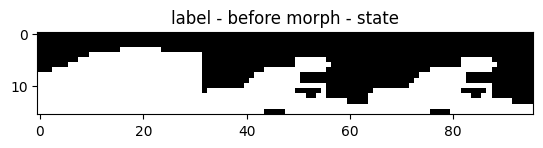

In [791]:
# Show a rendering of the environment
s = env.reset()
s_ = copy.deepcopy(s)
env.render()

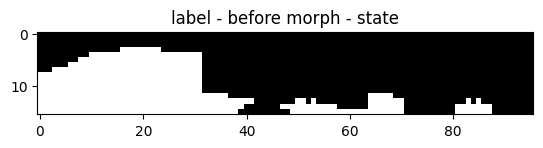

In [792]:
a = env.action_space.sample()
s1, r, d, i = env.step(a)
env.render()

### Intelligent behaviour on training data

In [793]:
# Initialize the environment
env = Sahba2008UltraSoundEnv(train_image, train_label, num_thresholds, vjs)
# Cast continuous values to bins
env = Discretize(env, lows, highs, bins)
# Set a maximum episode length
env = TimeLimit(env, episode_length)

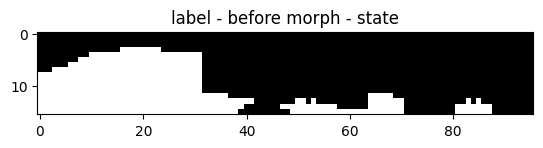

In [798]:
# Show a rendering of the environment
sp = env.reset()
env.render()

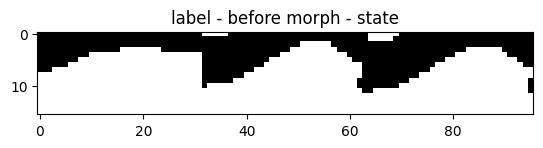

In [825]:
a = model.predict(sp, deterministic=True)
sp1, r, d, i = env.step(a)
env.render()
sp = sp1

### Random behaviour on test data

In [826]:
# Initialize the environment
env = Sahba2008UltraSoundEnv(test_image, test_label, num_thresholds, vjs)
# Cast continuous values to bins
env = Discretize(env, lows, highs, bins)
# Set a maximum episode length
env = TimeLimit(env, episode_length)

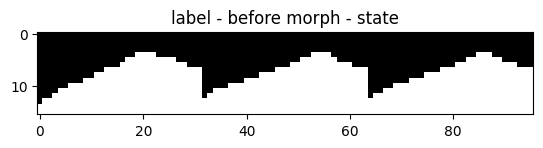

In [827]:
# Show a rendering of the environment
sp = env.reset()
env.render()

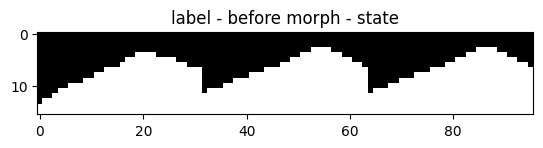

In [828]:
a = env.action_space.sample()
s1, r, d, i = env.step(a)
env.render()

### Intelligent behaviour on test data

In [829]:
# Initialize the environment
env = Sahba2008UltraSoundEnv(test_image, test_label, num_thresholds, vjs)
# Cast continuous values to bins
env = Discretize(env, lows, highs, bins)
# Set a maximum episode length
env = TimeLimit(env, episode_length)

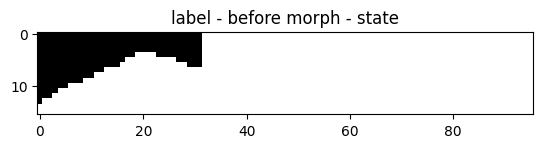

In [830]:
# Show a rendering of the environment
sp = env.reset()
env.render()

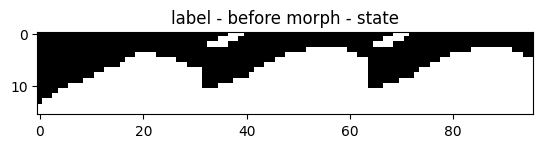

In [856]:
a = model.predict(sp, deterministic=True)
sp1, r, d, i = env.step(a)
env.render()
sp = sp1